<a href="https://colab.research.google.com/github/Estudiante-uno/Sistemas-y-Se-ales/blob/main/se%C3%B1ales_en_dominio_del_tiempo_y_frecuencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

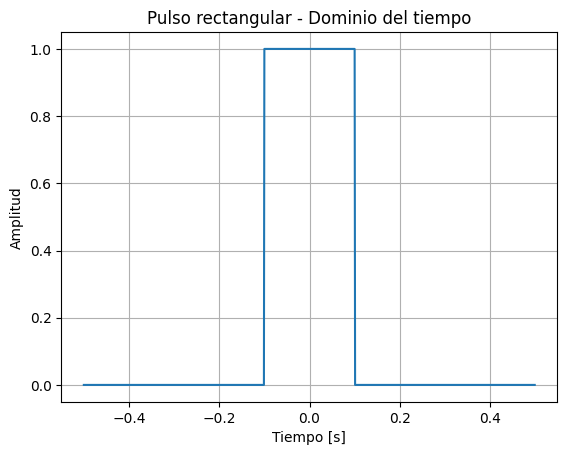

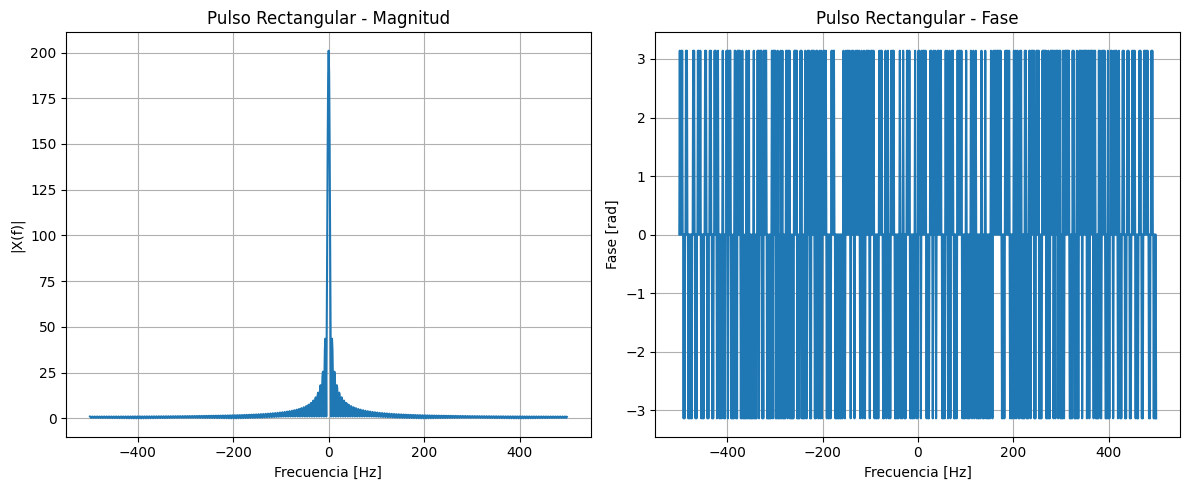

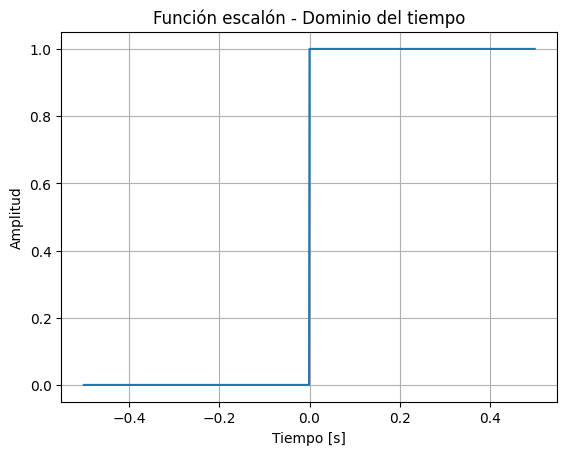

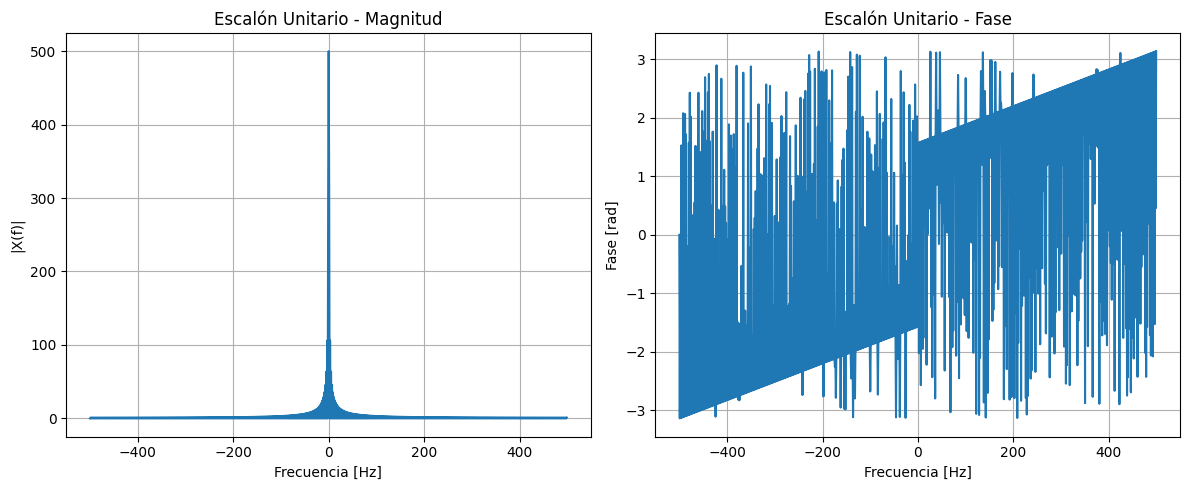

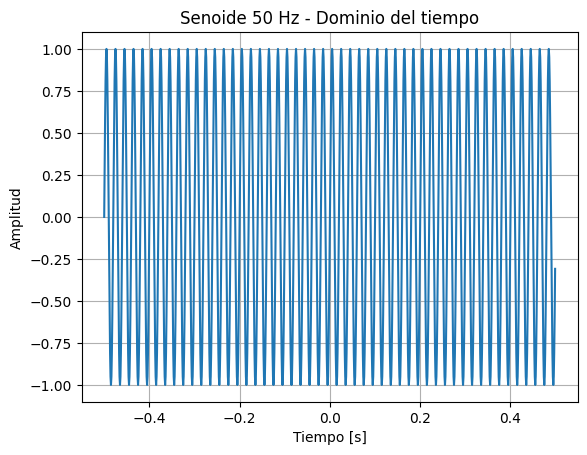

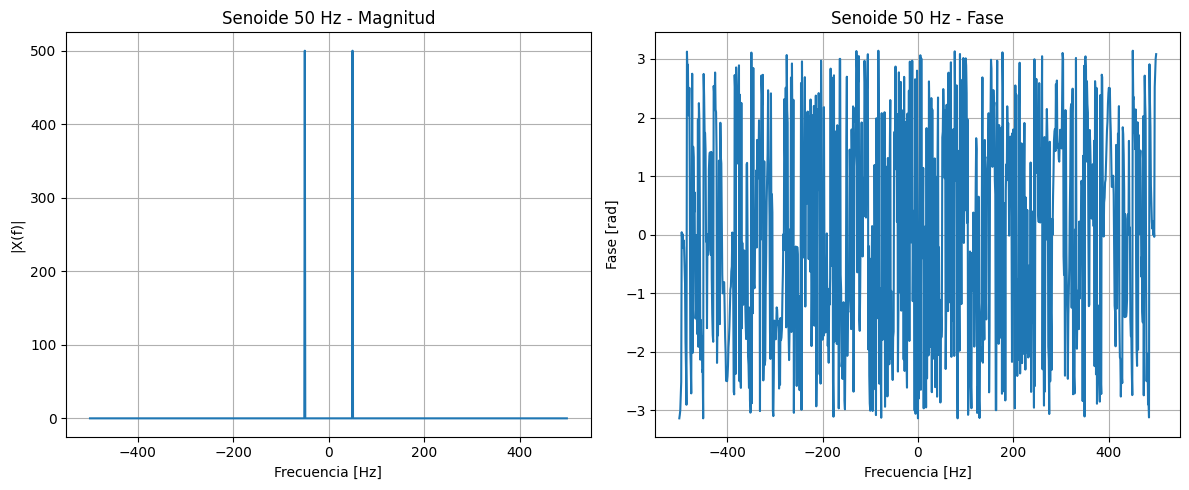

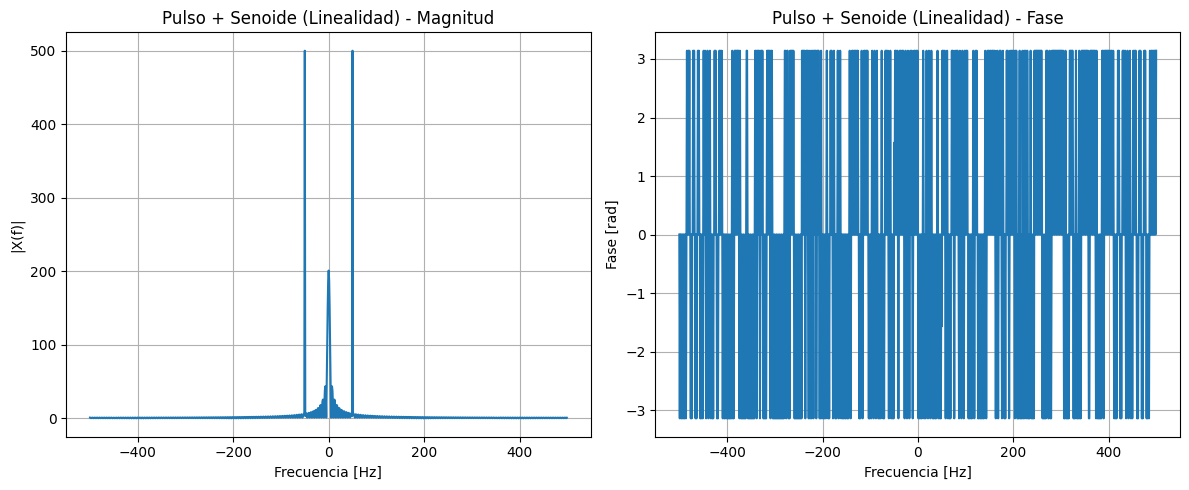

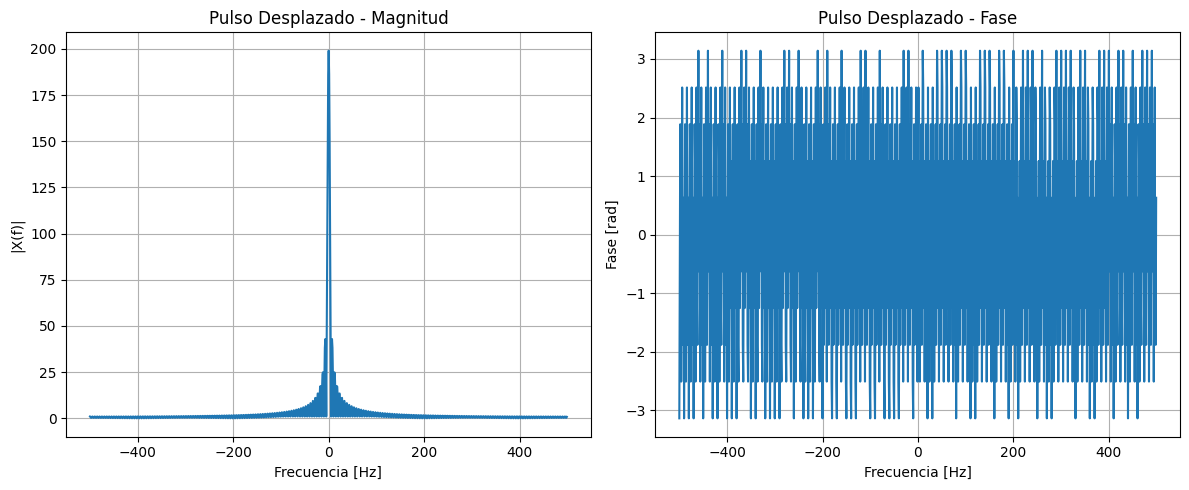

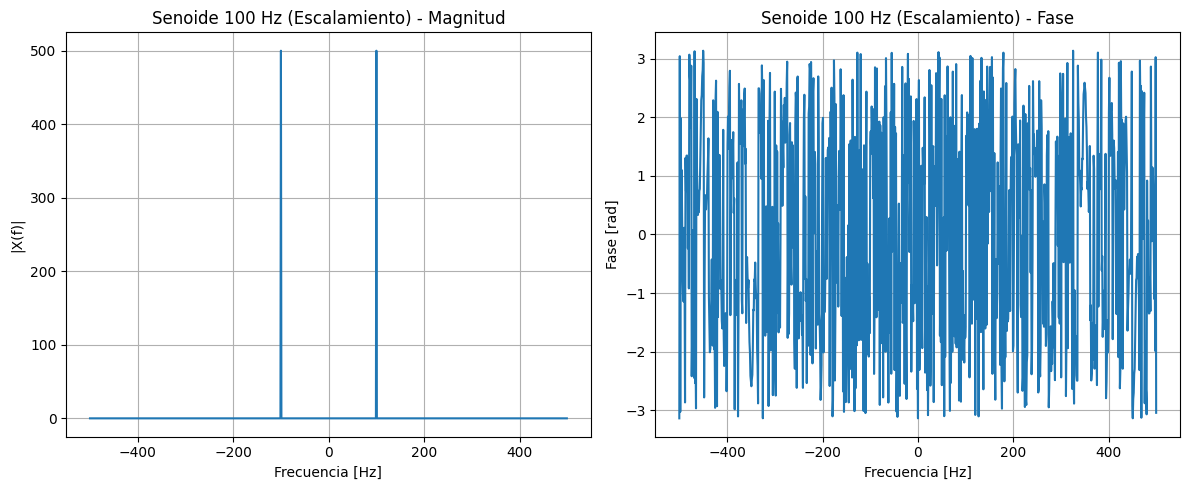

In [1]:
# Análisis de señales en dominio del tiempo y frecuencia
# Autor: [Meliton Alvarez]
# Fecha: [26/06/2025]
# ========================

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

# ========== PARÁMETROS GENERALES ==========
Fs = 1000            # Frecuencia de muestreo (Hz)
T = 1.0              # Duración total de la señal (segundos)
t = np.linspace(-0.5, 0.5, int(Fs * T), endpoint=False)  # Vector de tiempo

# ========== FUNCIÓN FFT ==========
def compute_fft(signal, Fs):
    """Calcula FFT, magnitud y fase de una señal."""
    N = len(signal)
    fft_values = fft(signal)
    fft_values_shifted = fftshift(fft_values)
    freq = fftshift(fftfreq(N, 1/Fs))
    magnitude = np.abs(fft_values_shifted)
    phase = np.angle(fft_values_shifted)
    return freq, magnitude, phase

# ========== FUNCIÓN DE GRAFICADO ==========
def plot_fft(freq, magnitude, phase, title):
    """Grafica magnitud y fase del espectro de frecuencia."""
    plt.figure(figsize=(12,5))

    # Magnitud
    plt.subplot(1, 2, 1)
    plt.plot(freq, magnitude)
    plt.title(f'{title} - Magnitud')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('|X(f)|')
    plt.grid()

    # Fase
    plt.subplot(1, 2, 2)
    plt.plot(freq, phase)
    plt.title(f'{title} - Fase')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Fase [rad]')
    plt.grid()

    plt.tight_layout()
    plt.show()

# ========== SEÑAL 1: PULSO RECTANGULAR ==========
width = 0.2
rect_pulse = np.where(np.abs(t) < width/2, 1.0, 0.0)

plt.figure()
plt.plot(t, rect_pulse)
plt.title('Pulso rectangular - Dominio del tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

f_rect, mag_rect, phase_rect = compute_fft(rect_pulse, Fs)
plot_fft(f_rect, mag_rect, phase_rect, "Pulso Rectangular")

# ========== SEÑAL 2: ESCALÓN UNITARIO ==========
step_function = np.heaviside(t, 1)

plt.figure()
plt.plot(t, step_function)
plt.title('Función escalón - Dominio del tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

f_step, mag_step, phase_step = compute_fft(step_function, Fs)
plot_fft(f_step, mag_step, phase_step, "Escalón Unitario")

# ========== SEÑAL 3: SENOIDE ==========
f_sin = 50  # Frecuencia en Hz
sine_wave = np.sin(2 * np.pi * f_sin * t)

plt.figure()
plt.plot(t, sine_wave)
plt.title('Senoide 50 Hz - Dominio del tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

f_sine, mag_sine, phase_sine = compute_fft(sine_wave, Fs)
plot_fft(f_sine, mag_sine, phase_sine, "Senoide 50 Hz")

# ========== PROPIEDAD: LINEALIDAD ==========
combined_signal = rect_pulse + sine_wave
f_comb, mag_comb, phase_comb = compute_fft(combined_signal, Fs)
plot_fft(f_comb, mag_comb, phase_comb, "Pulso + Senoide (Linealidad)")

# ========== PROPIEDAD: DESPLAZAMIENTO EN EL TIEMPO ==========
shift_time = 0.1
rect_pulse_shifted = np.where(np.abs(t - shift_time) < width/2, 1.0, 0.0)
f_shifted, mag_shifted, phase_shifted = compute_fft(rect_pulse_shifted, Fs)
plot_fft(f_shifted, mag_shifted, phase_shifted, "Pulso Desplazado")

# ========== PROPIEDAD: ESCALAMIENTO EN FRECUENCIA ==========
f_sin2 = 100
sine_wave2 = np.sin(2 * np.pi * f_sin2 * t)
f_sine2, mag_sine2, phase_sine2 = compute_fft(sine_wave2, Fs)
plot_fft(f_sine2, mag_sine2, phase_sine2, "Senoide 100 Hz (Escalamiento)")
